In [30]:
import pandas as pd
import matplotlib.pyplot as plt


In [144]:
df=pd.read_csv(r'G:\Mi unidad\Work\Phydata\curso Eduardo\clase2\accident_2015.csv')
df.head()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_forms_submitted_for_persons_in_motor_vehicles,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital_name,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,1,Alabama,10115,1,1,0,0,1,1,0,...,Unknown EMS Hospital Arrival Time,0,NaN,0,NaN,0,NaN,1,0,2015-03-27 23:28:00 UTC
1,1,Alabama,10191,1,1,0,0,2,2,0,...,Unknown EMS Hospital Arrival Time,0,NaN,0,NaN,0,NaN,1,1,2015-04-25 04:20:00 UTC
2,1,Alabama,10192,1,1,0,0,1,1,0,...,Not Applicable (Not Transported),0,NaN,0,NaN,0,NaN,1,0,2015-04-28 08:11:00 UTC
3,1,Alabama,10204,1,1,0,0,3,3,0,...,Unknown EMS Hospital Arrival Time,0,NaN,0,NaN,0,NaN,1,0,2015-05-01 18:15:00 UTC
4,1,Alabama,10231,1,1,0,0,2,2,0,...,0,0,NaN,0,NaN,0,NaN,1,0,2015-05-23 20:00:00 UTC


### Identificar, usando consultas y con gráficas las siguientes características del dataset:

El estado con el mayor número de accidentes es Texas con 3189 accidentes.


<Axes: xlabel='state_name'>

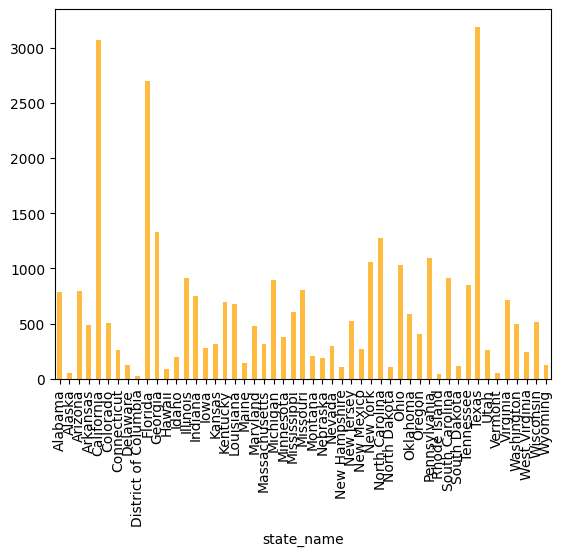

In [37]:
# Contando el número de accidentes por estado
accident_counts = df.groupby('state_name').size()

# Encontrando el estado con el mayor número de accidentes
max_accidents_state = accident_counts.idxmax()
max_accidents_count = accident_counts.max()

print(f"El estado con el mayor número de accidentes es {max_accidents_state} con {max_accidents_count} accidentes.")
accident_counts.plot(kind='bar', color='orange', alpha=0.75)

El terreno con el mayor número de accidentes es Urban con 16429 accidentes.


<Axes: xlabel='land_use_name'>

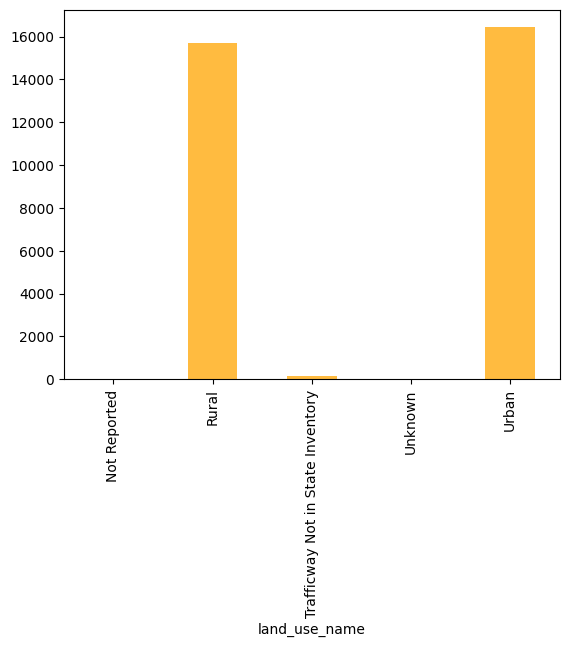

In [45]:
# Contando el número de accidentes por land use
accident_counts = df.groupby('land_use_name').size()

# Encontrando el estado con el mayor número de accidentes
max_accidents_land = accident_counts.idxmax()
max_accidents_count = accident_counts.max()

print(f"El terreno con el mayor número de accidentes es {max_accidents_land} con {max_accidents_count} accidentes.")
accident_counts.plot(kind='bar', color='orange', alpha=0.75)

La empresa con el mayor número de accidentes es State Highway Agency con 16022 accidentes.


<Axes: xlabel='ownership_name'>

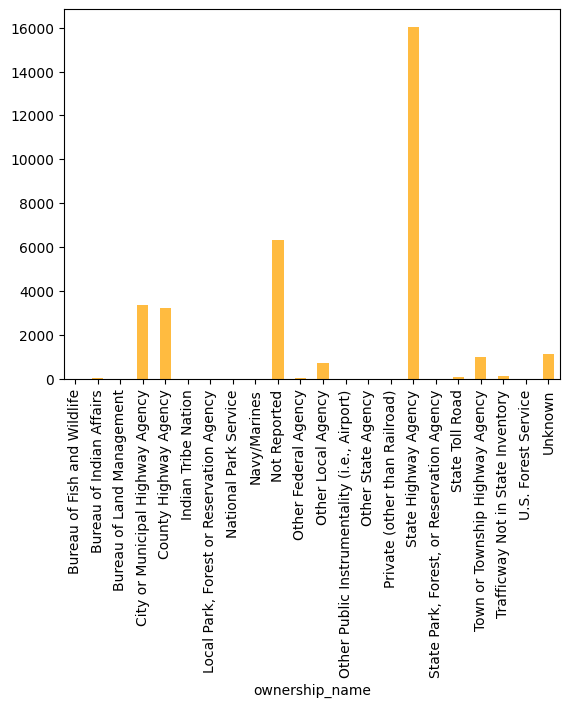

In [48]:
# Contando el número de accidentes por empresa
accident_counts = df.groupby('ownership_name').size()

# Encontrando el estado con el mayor número de accidentes
max_accidents_owner = accident_counts.idxmax()
max_accidents_count = accident_counts.max()

print(f"La empresa con el mayor número de accidentes es {max_accidents_owner} con {max_accidents_count} accidentes.")
accident_counts.plot(kind='bar', color='orange', alpha=0.75)

El terreno con el mayor número de accidentes es I-10 con 274 accidentes.


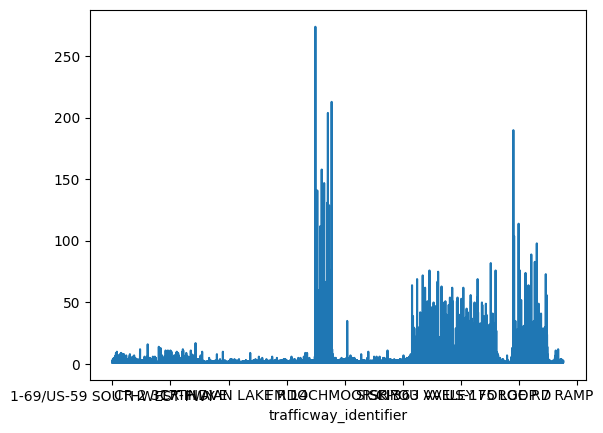

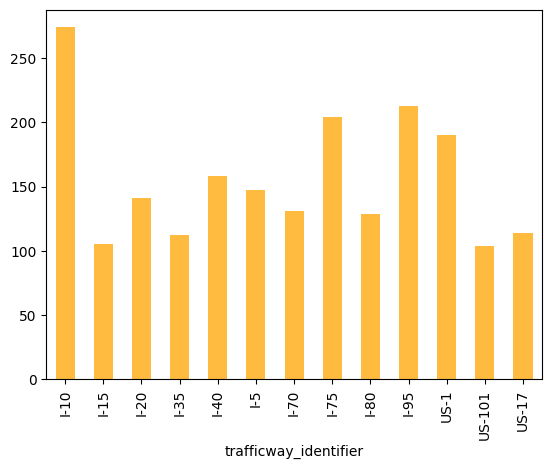

In [84]:
# Contando el número de accidentes por trafficway
accident_counts = df.groupby('trafficway_identifier').size()

# Encontrando el estado con el mayor número de accidentes
max_accidents_carretera = accident_counts.idxmax()
max_accidents_count = accident_counts.max()

print(f"El terreno con el mayor número de accidentes es {max_accidents_carretera} con {max_accidents_count} accidentes.")

accident_counts.plot()
plt.show()

#elejimos solo los mayores a 100 ya que son muchos datos y ensucian nuestra grafica
more_100_accident_counts=accident_counts[accident_counts.values>100]
more_100_accident_counts.plot(kind='bar', color='orange', alpha=0.75)
plt.show()

### Realizar un análisis mensual de accidentes por estado. 


La informacion del mes del accidente esta en al columna month_of_crash (tambien hay una llamada month_of_crash_names), por lo que para cada estado, deberiamos contar la cantidad de veces que aparece ahi. Esto se puede hacer de manera relativamente sencilla con una crosstab (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html). Las crosstab son una tabla que muestra la frecuencia con la que ciertas interacciones o combinaciones ocurren entre dos (o más) variables. Las crosstabs son útiles para comprender las relaciones entre datos.

In [106]:
monthly_accidents = pd.crosstab(df['state_name'], df['month_of_crash_name'])
monthly_accidents.head()

month_of_crash_name,April,August,December,February,January,July,June,March,May,November,October,September
state_name,,,,,,,,,,,,
Alabama,69,75,71,37,50,73,61,58,72,62,82,72
Alaska,5,4,4,2,2,10,5,4,7,4,5,4
Arizona,55,65,57,60,64,66,75,79,77,67,72,57
Arkansas,32,53,34,41,29,42,46,40,36,51,47,40
California,266,261,289,241,215,260,248,271,235,252,283,246


El Mes con menos accidentes es February con 1971 accidentes
El Mes con mas accidentes es October con 3049 accidentes


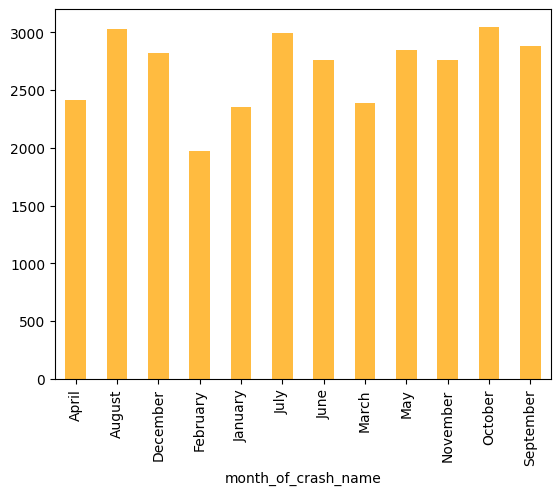

In [120]:
monthly_accidents.sum().plot(kind='bar', color='orange', alpha=0.75)
print(f"El Mes con menos accidentes es {monthly_accidents.sum().idxmin()} con {monthly_accidents.sum().min()} accidentes")
print(f"El Mes con mas accidentes es {monthly_accidents.sum().idxmax()} con {monthly_accidents.sum().max()} accidentes")

### Realizar un análisis según la hora del dia. 
   - Ahondar para los estados con mayor cantidad de muertes

   Al igual que el caso anterior se puede hacer analizando la tabla de frecuencias con un crosstab

In [132]:
hour_accidents = pd.crosstab(df['state_name'], df['hour_of_crash'])
hour_accidents.head()


hour_of_crash,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
state_name,,,,,,,,,,,,,,,,,,,,,
Alabama,30,27,30,22,24,30,32,29,19,27,...,37,40,25,51,49,48,47,42,34,23
Alaska,5,3,2,0,2,2,0,0,1,3,...,8,1,2,4,5,1,3,6,1,3
Arizona,21,33,24,18,18,34,31,34,22,29,...,28,44,46,41,51,43,54,37,42,30
Arkansas,20,15,12,8,13,11,22,18,14,22,...,23,23,29,41,27,24,28,22,17,19
California,129,121,136,94,93,126,137,90,76,74,...,142,122,124,154,204,171,208,187,159,124


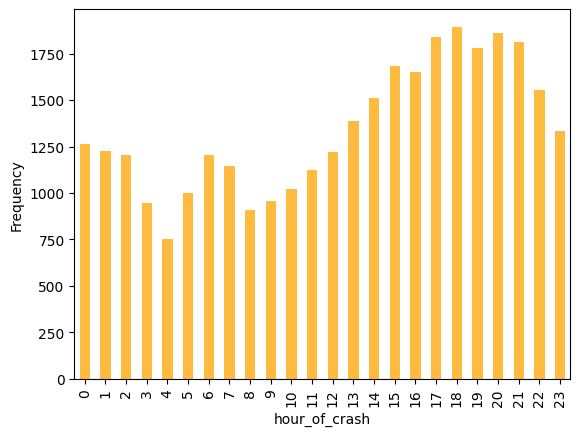

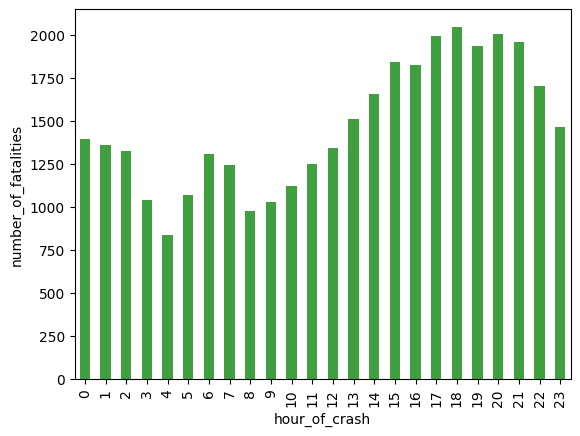

In [172]:
hourly_accidents = df.groupby('hour_of_crash').size()
hourly_accidents.plot(kind='bar', color='orange', alpha=0.75)
plt.ylabel('Frequency')
plt.show()
#esto me cuenta el numero de accidentes, pero puede morir mas de una persona por accidente, asi que para saber en que hora mueren mas personas
#lo que haremo es agrupar por hora del choque y numero de muertes para poder contarlas con sum 

hourly_fatalities = df.groupby('hour_of_crash')['number_of_fatalities'].sum()
hourly_fatalities.plot(kind='bar', color='green', alpha=0.75)
plt.ylabel('number_of_fatalities')
plt.show()

In [163]:
#los estados con mayor cantidad de muertes se obtienen de la misma manera
#agrupamos por estado y sumamos las muertes de la columna number_of_fatalities, el nlargest 5me muestra los 5 mas grandes
top_states = df.groupby('state_name')['number_of_fatalities'].sum().nlargest(5)
top_states_list = top_states.index.tolist()



Text(0, 0.5, 'number of fataliies')

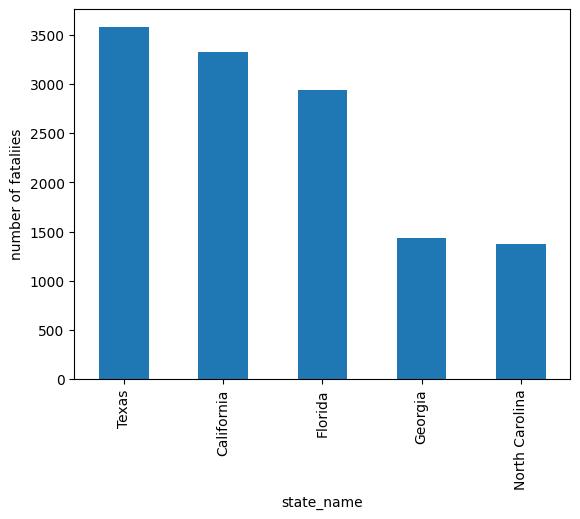

In [170]:
top_states.plot(kind='bar')
plt.ylabel('number of fataliies')

In [174]:
#analizemos estos 5 en detalle por hora
df_top_states = df[df['state_name'].isin(top_states_list)] #selecciono solo los del top

#agreugamos por nombre  y hora, lo que crea un grupo de cada estado, y cada uno con sus horas,(multi index) 
# luego seleccionamos solo la columna de muertes y sumamos
# el unstack lo usamos para convertir las horas que eran indices en columnas
top_states_hourly_fatalities = df_top_states.groupby(['state_name', 'hour_of_crash_name'])['number_of_fatalities'].sum().unstack()
top_states_hourly_fatalities

hour_of_crash_name,0:00am-0:59am,10:00am-10:59am,10:00pm-10:59pm,11:00am-11:59am,11:00pm-11:59pm,12:00pm-12:59pm,1:00am-1:59am,1:00pm-1:59pm,2:00am-2:59am,2:00pm-2:59pm,...,5:00am-5:59am,5:00pm-5:59pm,6:00am-6:59am,6:00pm-6:59pm,7:00am-7:59am,7:00pm-7:59pm,8:00am-8:59am,8:00pm-8:59pm,9:00am-9:59am,9:00pm-9:59pm
state_name,,,,,,,,,,,,,,,,,,,,,
California,150,101,185,76,136,109,133,135,157,150,...,131,164,149,221,95,184,80,216,77,204
Florida,133,84,171,92,148,100,112,91,113,117,...,100,138,109,201,76,174,58,211,76,196
Georgia,54,41,68,67,65,57,42,58,42,65,...,52,70,52,81,62,87,41,65,32,97
North Carolina,45,59,54,61,54,41,51,80,41,65,...,33,77,47,73,56,87,36,77,31,83
Texas,163,92,184,92,155,133,186,144,196,116,...,129,169,168,193,153,182,100,193,110,211


In [183]:
#para visualizar como va quedando
#df_top_states.groupby(['state_name', 'hour_of_crash_name'])['number_of_fatalities'].sum()

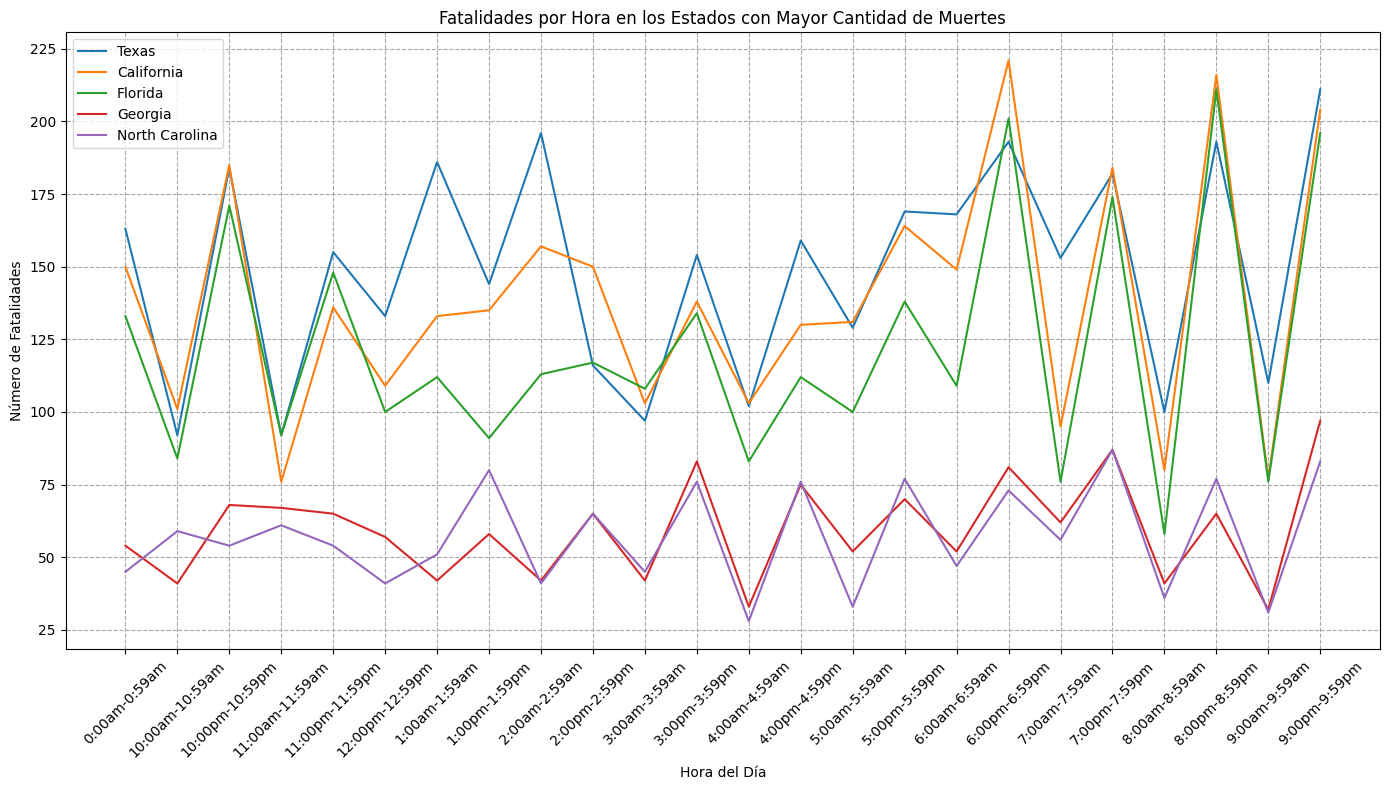

In [184]:
#graficamos los 5 mas grandes por hora con mas muertes
plt.figure(figsize=(14,8))

for state in top_states_list:
    plt.plot(top_states_hourly_fatalities.columns, top_states_hourly_fatalities.loc[state], label=state)

plt.title("Fatalidades por Hora en los Estados con Mayor Cantidad de Muertes")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Fatalidades")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

### Finalmente realizar un análisis resaltando la razón entre números de accidentes y conductores ebrios. 

Las columna con esta informacion es  number_of_drunk_drivers

In [199]:

#el total de accidentes es simplemente el total del df
total_accidents=len(df)

#contamos el numero la frecuencia con la que hay conductores ebrios
df['number_of_drunk_drivers'].value_counts()

number_of_drunk_drivers
0    23190
1     8835
2      260
3        2
Name: count, dtype: int64

In [200]:
#esto me entrega el numero total de conductores ebrios
accidentes_con_ebrios = df[df['number_of_drunk_drivers'] > 0].shape[0]


In [206]:
percentage_drunk=int(accidentes_con_ebrios/total_accidents*100)

print(f' Un {percentage_drunk}% de los accidentes involucran al menos 1 persona en estado de ebriedad')

 Un 28% de los accidentes involucran al menos 1 persona en estado de ebriedad


In [210]:
#queremos hacer un analisis temporal de la razon entre conductores ebrios y el total de accidentes
#para esto creamos una nueva columna "date"
df2=df[['year_of_crash', 'month_of_crash', 'day_of_crash']].rename(columns={'year_of_crash': 'year', 'month_of_crash': 'month', 'day_of_crash': 'day'})
df['date']=pd.to_datetime(df2[['year', 'month', 'day']])
df['date'].head()


0   2015-03-27
1   2015-04-25
2   2015-04-28
3   2015-05-01
4   2015-05-23
Name: date, dtype: datetime64[ns]

In [217]:
# Accidentes totales por año
accidentes_totales_por_año = df.groupby(df['date'].dt.month).size()

# Accidentes con conductores ebrios por año
accidentes_ebrios_por_mes = df[df['number_of_drunk_drivers'] > 0].groupby(df['date'].dt.month).size()

# Cálculo de la proporción
proporcion_ebrios = accidentes_ebrios_por_mes / accidentes_totales_por_mes


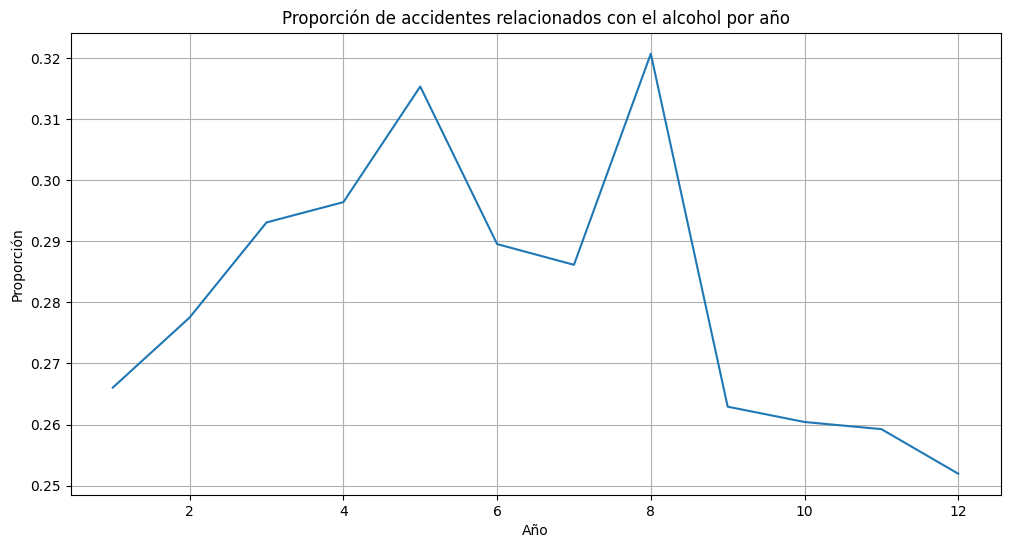

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
proporcion_ebrios.plot()
plt.title('Proporción de accidentes relacionados con el alcohol por Mes')
plt.ylabel('Proporción')
plt.xlabel('Mes')
plt.grid(True)
plt.show()


In [216]:
proporcion_ebrios

date
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
2015   NaN
dtype: float64